In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("D:/Jupyter_projects/data/titanic_train.csv") 
test_df = pd.read_csv("D:/Jupyter_projects/data/titanic_test.csv")

# Функция для формирования csv-файла посылки на Kaggle:

In [3]:
def write_to_submission_file(predicted_labels, out_file, train_num=891,
                    target='Survived', index_label="PassengerId"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(train_num + 1,
                                                  train_num + 1 +
                                                  predicted_labels.shape[0]),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [4]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Crease, Mr. Ernest James",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Vander Planke, Mr. Julius",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


## Заменяем пропуски средними значениями

In [10]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna('S', inplace=True)
test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

## Кодируем категориальные признаки Pclass, Sex, SibSp, Parch и Embarked с помощью техники One-Hot-Encoding.

In [11]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Pclass'], 
                                               prefix="PClass"),
                      pd.get_dummies(train_df['Sex'], prefix="Sex"),
                      pd.get_dummies(train_df['SibSp'], prefix="SibSp"),
                      pd.get_dummies(train_df['Parch'], prefix="Parch"),
                     pd.get_dummies(train_df['Embarked'], prefix="Embarked")],
                     axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Pclass'], 
                                             prefix="PClass"),
                      pd.get_dummies(test_df['Sex'], prefix="Sex"),
                      pd.get_dummies(test_df['SibSp'], prefix="SibSp"),
                      pd.get_dummies(test_df['Parch'], prefix="Parch"),
                    pd.get_dummies(test_df['Embarked'], prefix="Embarked")],
                     axis=1)

In [12]:
y = train_df['Survived']

In [13]:
train_df.drop(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 
               'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], 
              axis=1, inplace=True)
test_df.drop(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], 
             axis=1, inplace=True)

In [14]:
train_df.shape, test_df.shape

((891, 24), (418, 25))

## В тестовой выборке появляется новое значение Parch = 9, которого нет в обучающей выборке. Проигнорируем его.

In [15]:
set(test_df.columns) - set(train_df.columns)

{'Parch_9'}

In [16]:
test_df.drop(['Parch_9'], axis=1, inplace=True)

In [17]:
train_df.head()

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [18]:
test_df.head()

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,62.0,9.6875,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


# 1. Дерево решений без настройки параметров


## Обучите на имеющейся выборке дерево решений (DecisionTreeClassifier) максимальной глубины 2. Используйте параметр random_state=17 для воспроизводимости результатов.

In [19]:
first_tree = DecisionTreeClassifier(max_depth=2, random_state=17).fit(train_df, y)

In [20]:
first_tree.score(train_df, y)

0.7957351290684624

## Сделайте с помощью полученной модели прогноз для тестовой выборки

In [21]:
y_test = first_tree.predict(test_df)

In [22]:
write_to_submission_file(y_test, 
                         'titanic_predictions.csv')

## Отобразите дерево с помощью export_graphviz и dot.

In [23]:
export_graphviz(first_tree, out_file='titanic.dot',
                class_names = ['Died','Survived'],
                feature_names=train_df.columns, filled=True)

In [24]:
!dot -Tpng titanic.dot -o titanic.png

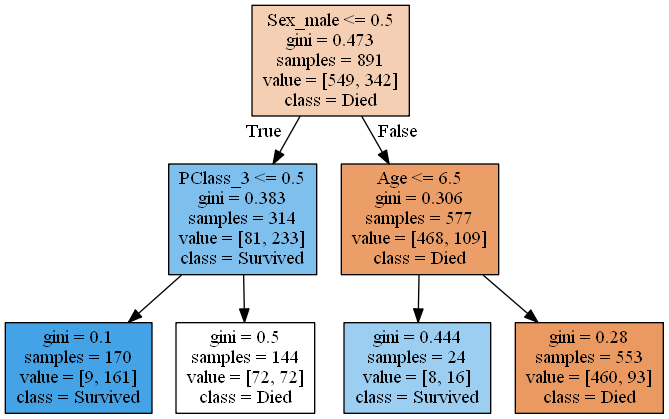

In [25]:
from IPython.display import Image
Image(filename='titanic.png')

# 2. Дерево решений с настройкой параметров

## Обучите на имеющейся выборке дерево решений (DecisionTreeClassifier). Также укажите random_state=17. Максимальную глубину и минимальное число элементов в листе настройте на 5-кратной кросс-валидации с помощью GridSearchCV.

### Пятикратная кросвалидация

In [26]:
sec_tree = DecisionTreeClassifier(random_state=17)

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(sec_tree, train_df, y, cv=5)

array([0.75418994, 0.81460674, 0.78651685, 0.74157303, 0.78089888])

In [29]:
np.mean(cross_val_score(sec_tree, train_df, y, cv=5))

0.7755570899504112

### Настройка параметров дерева

In [30]:
tree_params = {'max_depth': list(range(1, 5)), 
               'min_samples_leaf': list(range(1, 5))}

In [31]:
tree_grid = GridSearchCV(sec_tree, tree_params, cv=5, n_jobs=-1)

In [32]:
%%time
tree_grid.fit(train_df, y)

Wall time: 4.07 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4]})

### Лучшее дерево

In [33]:
tree_grid.best_score_, tree_grid.best_params_

(0.8103132257862031, {'max_depth': 3, 'min_samples_leaf': 3})

In [34]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=17)

# Визуализация

In [35]:
export_graphviz(tree_grid.best_estimator_,
                out_file='titanic2.dot',
                class_names = ['Died','Survived'],
                feature_names=train_df.columns, filled=True)

In [36]:
!dot -Tpng titanic2.dot -o titanic2.png

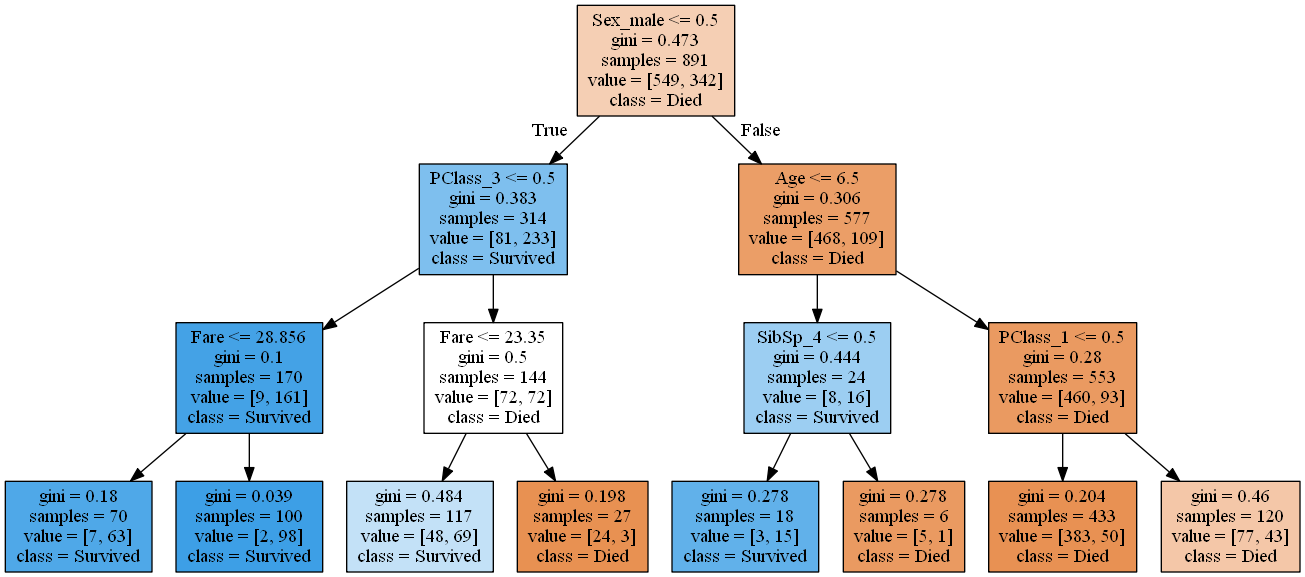

In [37]:
from IPython.display import Image
Image(filename='titanic2.png')

In [38]:
# 7 Survived 63 Died

### Какой получилась средняя доля верных ответов на кросс-валидации для дерева решений с лучшим сочетанием гиперпараметров max_depth и min_samples_leaf?

In [39]:
cross_val_score(tree_grid.best_estimator_, train_df, y, cv=5)

array([0.82122905, 0.81460674, 0.80898876, 0.78651685, 0.82022472])

In [40]:
np.mean(cross_val_score(tree_grid.best_estimator_, train_df, y, cv=5))

0.8103132257862031

## Сделайте с помощью полученной модели прогноз для тестовой выборки.

In [41]:
tree_valid_pred = tree_grid.best_estimator_.predict(test_df)

In [42]:
write_to_submission_file(tree_valid_pred, 'titanic2_predictions.csv')